# Econ 490: Creating Meaningful Visuals (9)

## Prerequisites

1. Be able to effectively use Stata do files and generate log files.
2. Be able to change your directory so that Stata can find your files.
3. Import datasets in csv and dta format. 
4. Save data files. 

## Learning Outcomes 
- Know when to use the following kinds of visualizations to answer specific questions using a data set:
    - scatterplots
    - line plots
    - bar plots
    - histograms
- Generate and fine-tune visualizations using the Stata command `twoway` and its different options
- Use `graph export` to save visualizations in various formats including `.svg`, `.png` and `.pdf`

<div class="alert alert-block alert-info">
<b>Note:</b> Your best approach to completing this module is to copy and paste these commands into a do-file in Stata. Because Stata produces graphs in a separate window, Jupyter Notebooks will not produce a graph that you can see when you execute the commands on this page. The most we can do is export image files to a directory on your computer. You will see these commands whenever a graph is produced below. 
</div>

We'll continue working with the fake data data set we have been using as we work developing our research skills. Recall that this data set is simulating information for workers in the years 1982-2012 in a fake country where a training program was introduced in 2003 to boost their earnings. 

In [1]:
import stata_setup
stata_setup.config('C:\Program Files\Stata18/','se')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\irene\AppData\Local\Temp\ipykernel_14836\4069384911.py:2: SyntaxWarning: invalid escape sequence '\P'
  stata_setup.config('C:\Program Files\Stata18/','se')



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 19 Aug 2024
Serial number: 401809301518
  Licensed to: Irene Berezin
               UBC

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
>>> import sys
>>> sys.path.append('/Applications/Stata/utilities') # make sure this is the same as what you set up in Module - 1, Section 1.5.1: Setting Up PyStata
>>> from pystata import config
>>> config.init('se')

In [3]:
%%stata

use fake_data, clear 


. 
. use fake_data, clear 

. 


Data visualization is an effective way of communicating ideas to your audience, whether it's for an academic paper or a business setting. It can be a powerful medium to motivate your research, illustrate relationships between variables and provide some intuition behind why you applied certain econometric methods.

The real challenge is not understanding how to use Stata to create graphs. Instead, the challenge is figuring out which graph will do the best job at telling your empirical story. Before creating any graphs, be sure to identify the message you want the graph to convey. Try to answer these questions: Who is our audience? What is the question you're trying to answer?


## 9.1 Types of graphs 
#### 9.1.1 Scatter plot

<!-- what is it? and, when to use? --> 
Scatter plots are frequently used to demonstrate how two quantitative variables are related to one another. This plot works well when we are interested in showing relationships and groupings among variables from relatively large data sets.

Below is an example.

- ![Relationship of country religiosity vs wealth](https://ourworldindata.org/uploads/2013/11/GDP-vs-Religion.png) 

Let's say we want to plot the log-earnings by year using our fake data set. We begin by generating a new variable for log earnings. 

In [4]:
%%stata

gen log_earnings = log(earnings)

la var log_earnings "Log-earnings" // We are adding the label "log-earnings" to the variable log_earnings


. 
. gen log_earnings = log(earnings)

. 
. la var log_earnings "Log-earnings" // We are adding the label "log-earnings" 
> to the variable log_earnings

. 


Now let's create a new data set that includes a variable that is the log earnings by year. We use the command `preserve` so that later on we can `restore` the original data set. 

In [5]:
%%stata

preserve
collapse (mean) log_earnings, by(year)
describe


. 
. preserve

. collapse (mean) log_earnings, by(year)

. describe

Contains data
 Observations:            17                  
    Variables:             2                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 Calendar Year
log_earnings    float   %9.0g                 (mean) log_earnings
-------------------------------------------------------------------------------
Sorted by: year
     Note: Dataset has changed since last saved.

. 


To create graph between two numeric variables, we need to use the command `twoway`. The format for this command is `twoway (type_of_graph x-axis_variable y-axis_variable)`. 

In this case we want to create a graph that is a scatterplot that shows earnings as the dependent variable (y-axis) and year as the explanatory variable (x-axis variable).


. 
. twoway (scatter log_earnings year)

. 
. graph export graph1.jpg, as(jpg) replace
file graph1.jpg written in JPEG format

. 


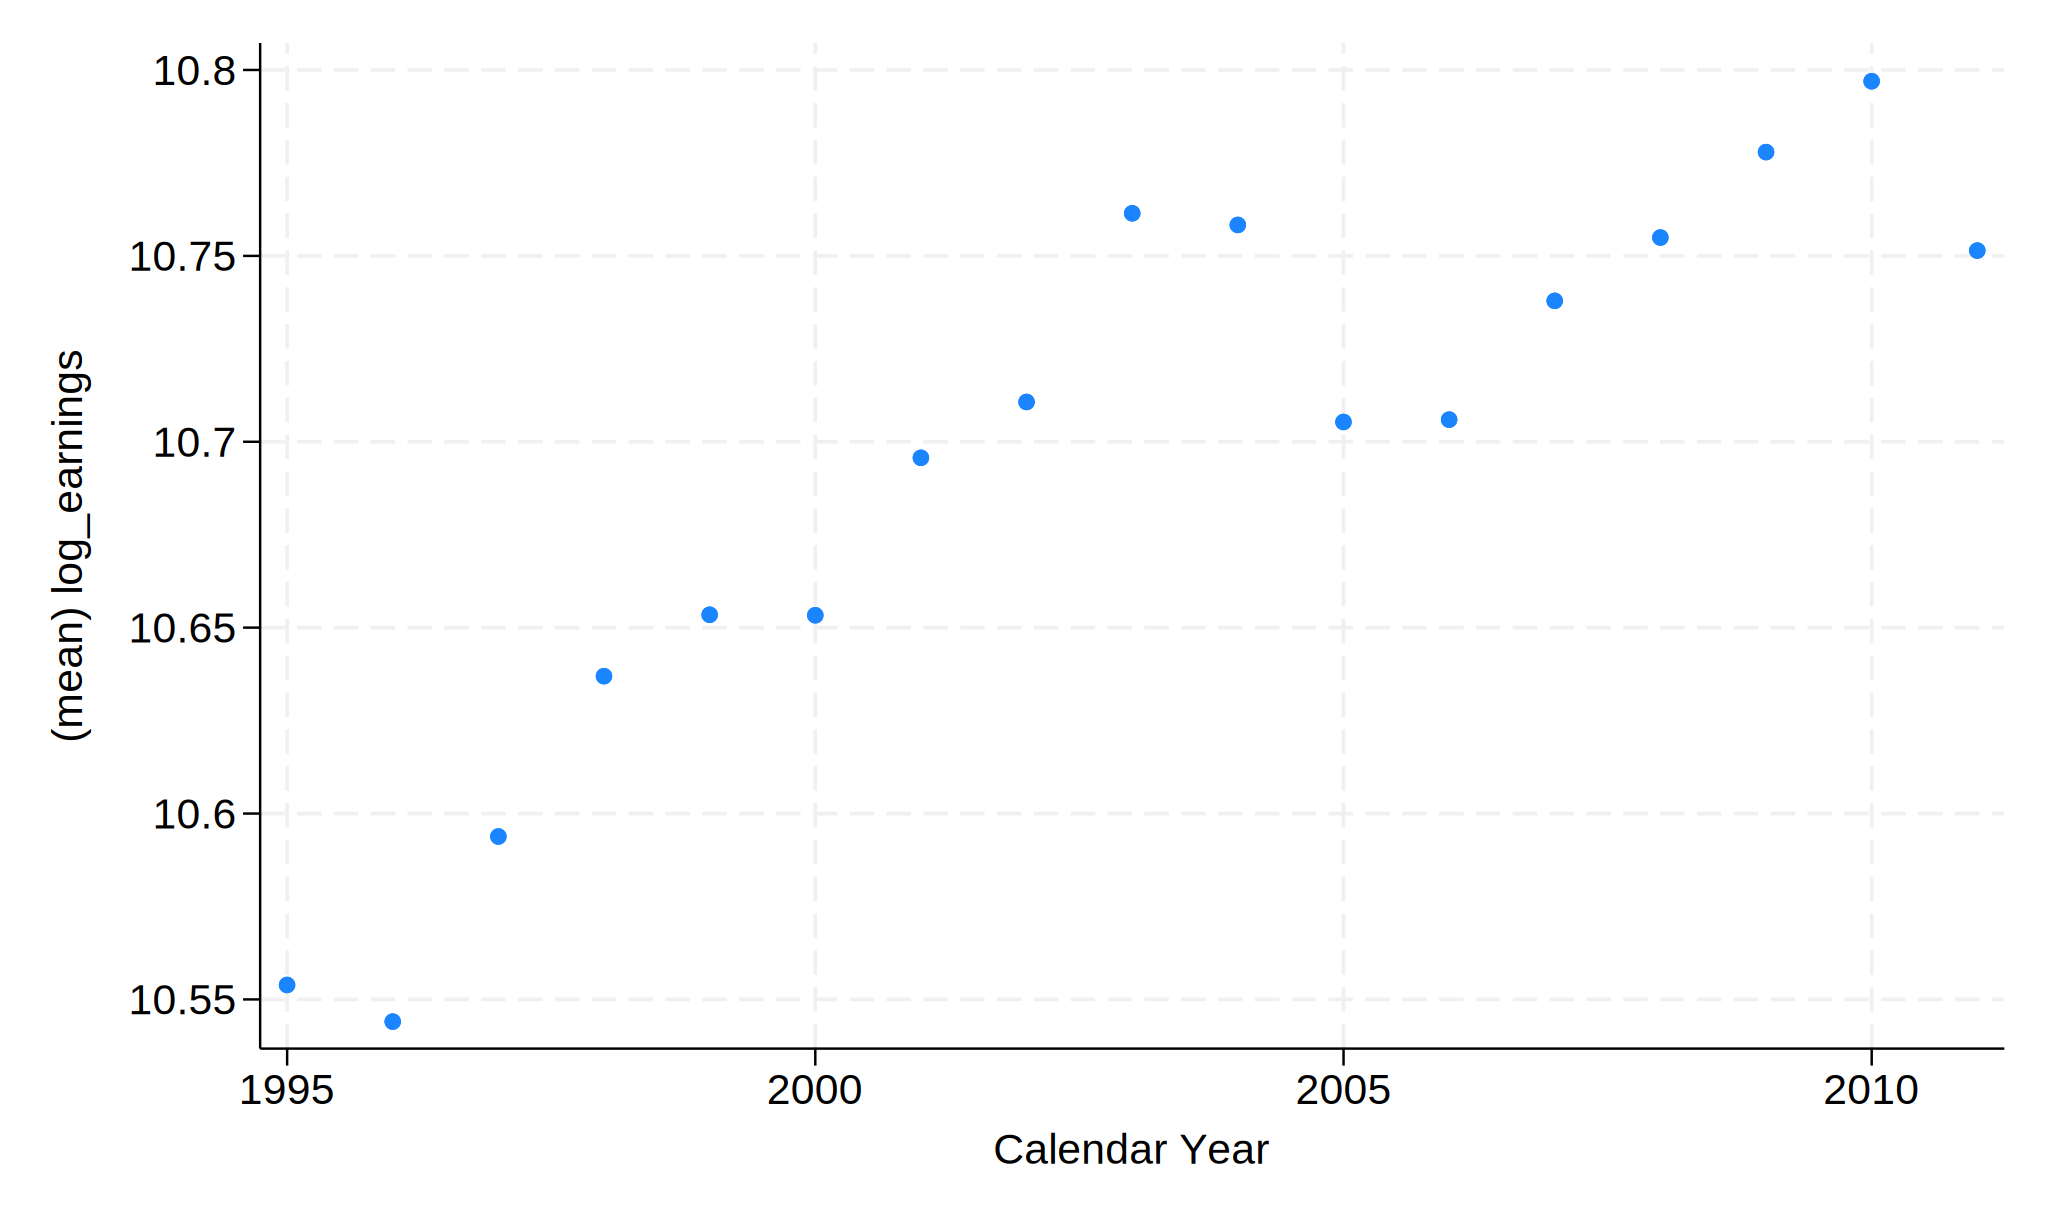

In [6]:
%%stata

twoway (scatter log_earnings year)

graph export graph1.jpg, as(jpg) replace

Note that no graph will have appeared in the Notebook when you executed this command. However you should be able to find the graph directly saved under the name "graph1.jpg". That graph will look like this:

![myscatterplot](img/myscatterplot.svg)

A second way that you could create this graph is by replacing the graph type `scatter` with the graph type `connected`. This will create the graph below.


. 
. twoway (connected log_earnings year)

. 
. graph export graph1.jpg, as(jpg) replace
file graph1.jpg written in JPEG format

. 


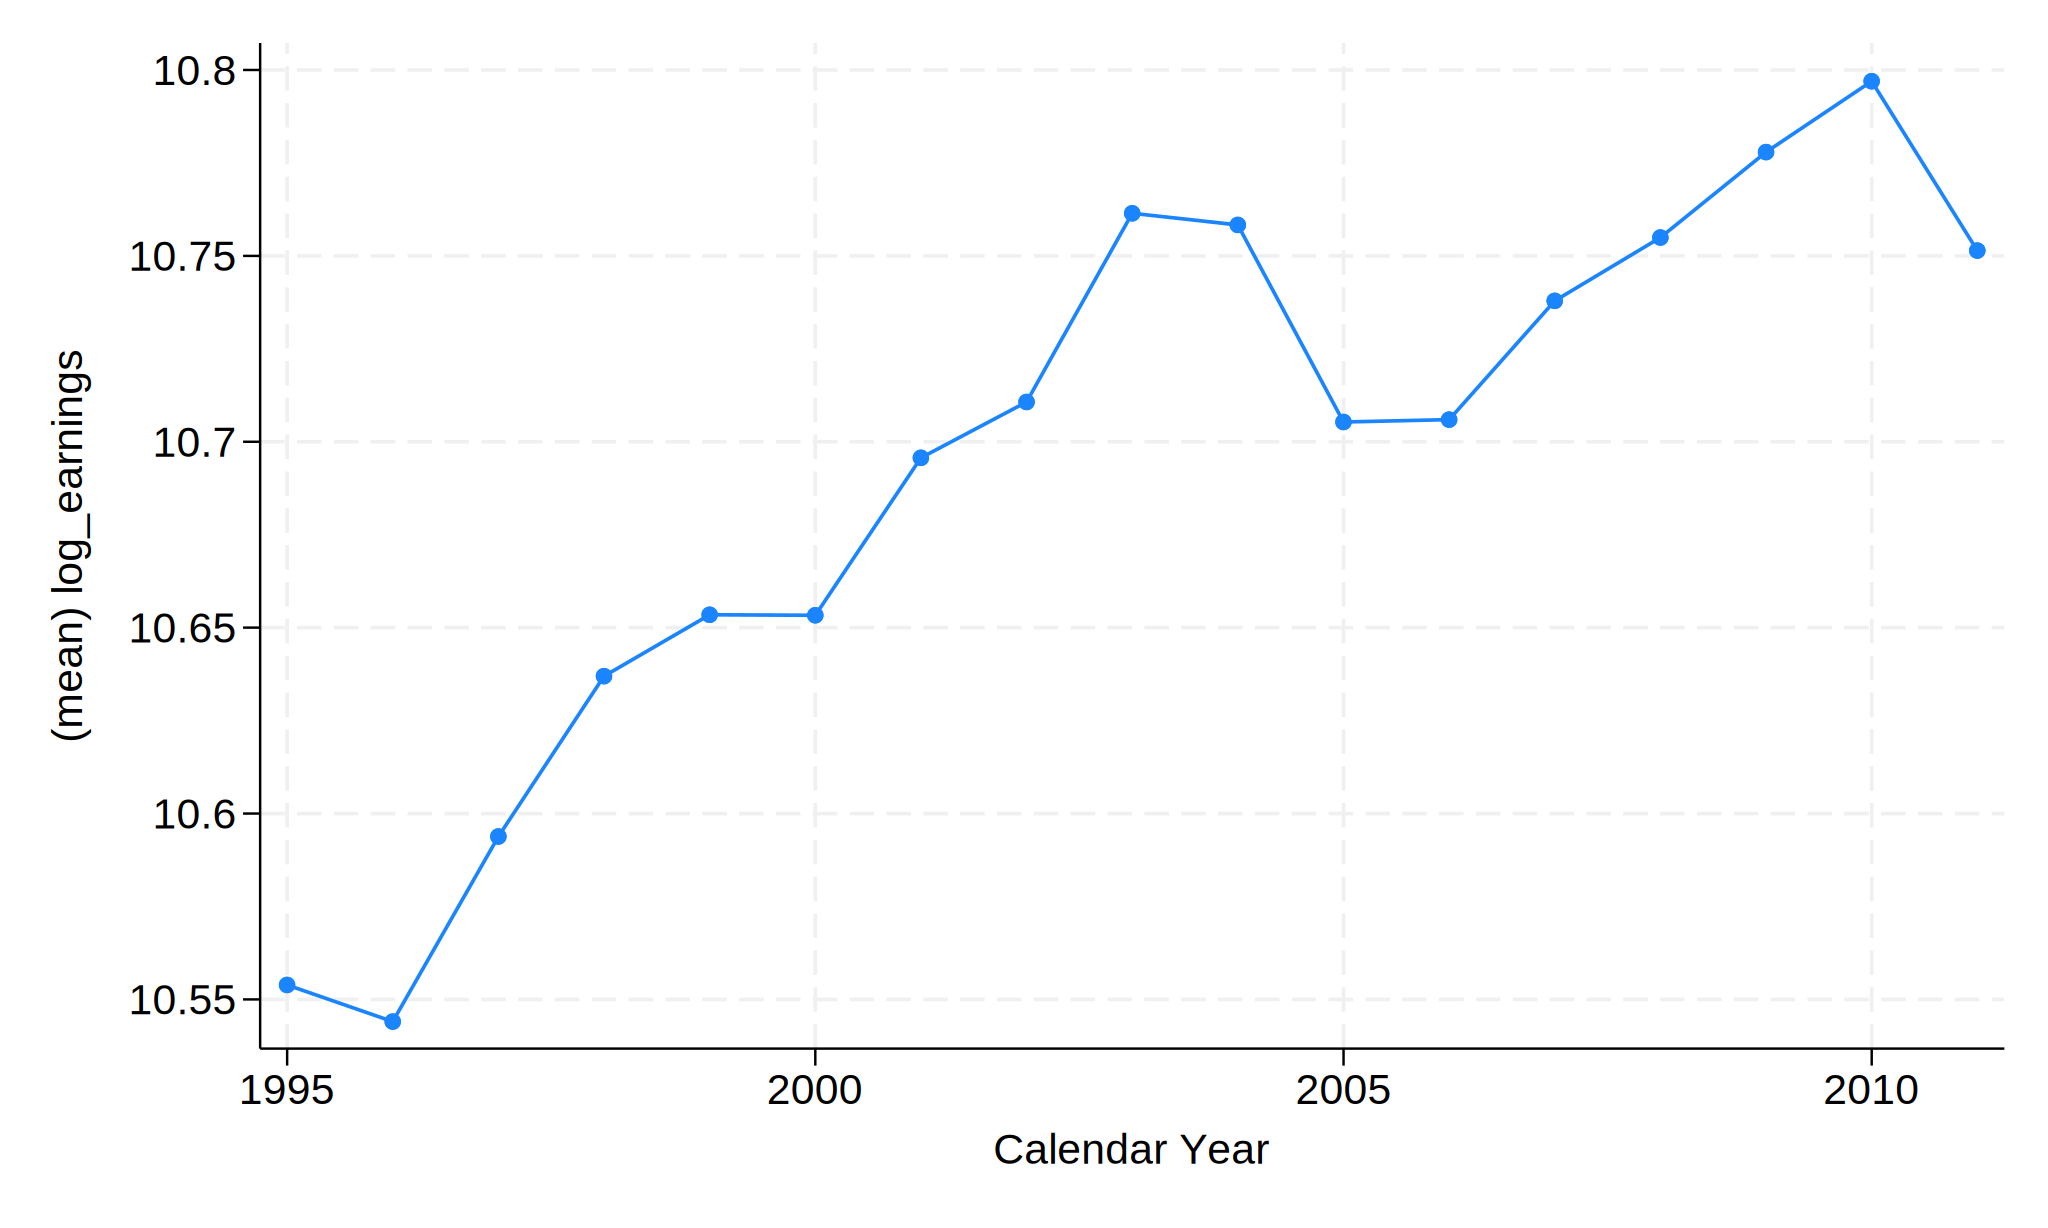

In [7]:
%%stata

twoway (connected log_earnings year)

graph export graph1.jpg, as(jpg) replace

![connected-scatter-plot](./img/myconnectedplot.svg)

#### 9.1.2 Line plot

<!-- what is it? and, when to use? --> 
Line plots visualize trends with respect to an independent, ordered quantity (e.g., time). This plot works well when one of our variables is ordinal (time-like) or when we want to display multiple series on a common timeline.

Line plots can be generated using Stata's `twoway` command we saw earlier. This time, instead of writing `scatter` for the type of graph, we write `line`.

Below we introduce something new, we have added options to the graph that change the title on the x-axis (`xtitle`) and on the y-axis (`y-title`). Options for the graph as a whole appear at the end of the command. As we will see options that affect an individual plot appear in the brackets where the plot is specified. 


. 
. twoway (line log_earnings year), xtitle("Year") ytitle("Log-earnings")

. 
. graph export graph3.jpg, as(jpg) replace
file graph3.jpg written in JPEG format

. 


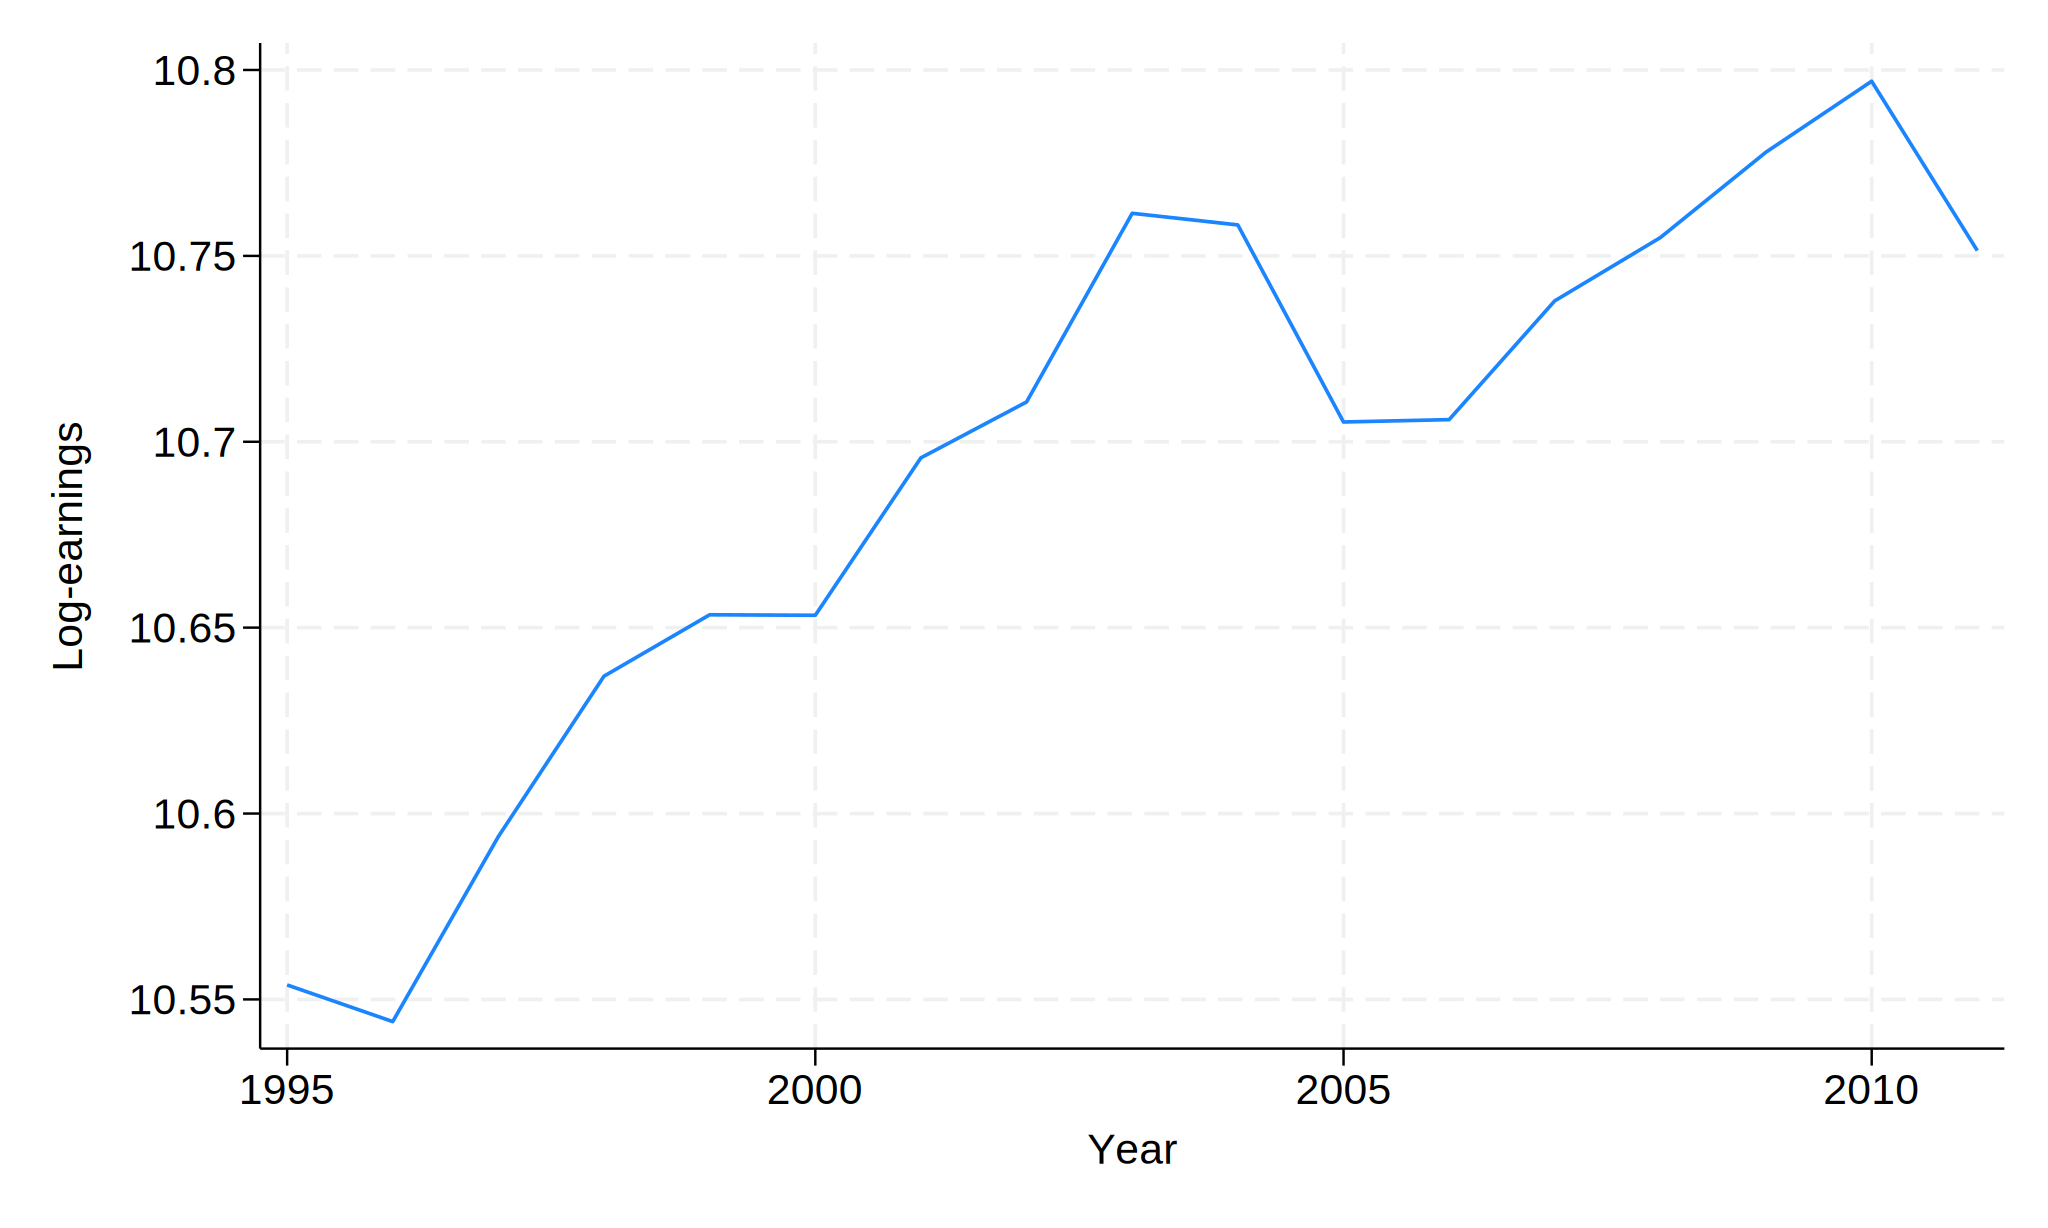

In [8]:
%%stata

twoway (line log_earnings year), xtitle("Year") ytitle("Log-earnings")

graph export graph3.jpg, as(jpg) replace

It should look something like this:

![mylineplot](img/mylineplot.svg)

Now let's try creating a line plot with multiple series on a common twoway graph. To create this graph we first need to `restore` our data to the original version of the "fake_data" data set. 

In [ ]:
%%stata

restore

Now that we have done that, we can collapse it to create the mean of log earnings by both year and whether not an individual is in a treatment group. 

In [ ]:
%%stata

preserve

collapse (mean) log_earnings, by(treated year)

describe

We can create a graph that separating the earnings between the treated and non-treated over time. You can see that we need to add each line separately to the graph. Within those brackets we can choose the observations we want included. We can also add line specific options, like `color`.

In [ ]:
%%stata

twoway (connected log_earnings year if treated==1, color(orange)) (connected log_earnings year if treated==0, color(purple)), xtitle(Year) ytitle(Average Log Earnings)

graph export graph4.jpg, as(jpg) replace

One final tip about working with scatterplots. Sometimes you will want to draw fit line on your graph that approximates the relationship between the two variables. You can do this by adding a second graph to the twoway plot that uses the graph type `lfit`.

#### 9.1.3 Histogram

<!-- what is it? and, when to use? --> 
Histograms visualize the distribution of one quantitative variable. This plot works well when we are working with a discrete variable and are interested in visualizing all its possible values and how often they each occur.

Now let's restore the original data set so that we can plot the distribution of *log_earnings* and draw a simple histogram.

In [ ]:
%%stata

restore

histogram log_earnings

graph export graph5.jpg, as(jpg) replace

It will look like this:

![myhistogram](img/myhistogram.svg)

You can also draw two histograms on one plot. They won't look very nice unless you change the plot colours. But if you execute the command below it should create a nice graph that allows you to compare the distributions on log earnings between the treatment and control groups. 

In [ ]:
%%stata

twoway (histogram log_earnings if treated==0, color(orange) lcolor(black))     ///
    (histogram log_earnings if treated==1, color(olive) lcolor(black)),        ///
    legend(label(1 "Treated") label(2 "Untreated"))

graph export graph6.jpg, as(jpg) replace

#### 9.1.4 Bar plot

<!-- what is it? and, when to use? --> 
Bar plots visualize comparisons of amounts. They are useful when we are interested in comparing a few categories as parts of a whole, or across time. 

Now let's plot mean earnings by region. Note that the regions are numbered in our data set. 

In [ ]:
%%stata

graph bar (mean) earnings, over(region)
graph export graph7.jpg, as(jpg) replace

![mybarchart](img/mybarchart.svg)

We can also create a horizontal bar plot by using the option `hbar` instead of `bar`.

In [ ]:
%%stata

graph hbar (mean) earnings, over(region)

graph export graph8.jpg, as(jpg) replace

![mybarchart2](./img/mybarchart2.svg)

We can also group our bars over another variable (or "category").

In [ ]:
%%stata

graph hbar (mean) earnings,  over(treated) over(region)

graph export graph9.jpg, as(jpg) replace

![mybarchart3](img/mybarchart3.svg)

## 9.2 Exporting Format

So far, we have been exporting our graphs in svg format. However, you should keep in mind that you can also export graphs in other formats such as `.jpg`, `.png` and `.pdf`. This may be particularly helpful if you plan to use LaTeX for writing your paper, as `.svg` files cannot be used with LaTeX PDF output. 

## 9.3 Fine-tuning a Graph Further

In order to customize our graph further, we can use the tools in the Stata graph window or the graph option commands we have been using in this module. Namely, we can include and adjust the following: 

- title 
- axis titles
- legend 
- axis 
- scale
- labels 
- theme (i.e. colour, appearance)
- adding lines, text or objects 

Let's see how to add some of these customizations to our graphs in practice. For example, let's modify our latest bar graph such that:
- the title is "Earnings by region and treatment": we do this with the option `title()`;
- the axis title is "Earnings (average)": we do this with the option `ytitle()`;
- the regions and the treatment status are labeled: we do this with the sub-option *relabel* within the *over* option, `over(varname, relabel())`. Remember that relabelling follows the order in which the values appear: e.g., for treated and untreated, the not treated group appears first and the treated group appears second, therefore we have to use *1* to indicate the non-treated group and *2* to indicate the treated group: `over(treated, relabel(1 "Not treated" 2 "Treated"))`;
- the background color is white: we do this with the option `graphregion(color())`;
- the color of the bars is dark green: we do this using the option *bar* and its suboptions. Remember that we need to specify this option for each variable we are plotting in the bars. In our case, we are only plotting variable *earnings*, which is by definition the first variable we are plotting, therefore all sub-options refer to *1*: `bar(1, fcolor(dkgreen))`.

In [ ]:
%%stata

graph hbar (mean) earnings, ///
    over(treated, relabel(1 "Not treated" 2 "Treated"))  ///
    over(region, relabel(1 "A" 2 "B" 3 "C" 4 "D" 5 "E")) ///
    title("Earnings by region and treatment") ytitle("Earnings (average)") ///
    graphregion(color(white)) bar(1, fcolor(dkgreen))

graph export graph10.jpg, as(jpg) replace

These are just some of the customizations available to you. Other common options are:
- adding a labelled  legend to our graphs. To include the legend, we use the option `legend( label(number_of_label "label"))`;
- adding a vertical line, for example one indicating the year in which the treatment was administered (2002). To include the indicator line we use the the option  `xline()`. The line can also have different characteristics. For example, we can change its color and pattern using the options `lcolor()` and `lpattern()`.

You can always go back to the Stata documentation to explore the options available to you based on your needs. You can also adjust many of these aspecs in the Graph Editor that appears wheneve you create a new graph. Just don't forget to save your graph when you are done since this won't be in your do-file!

When thinking about colors, always make sure that your graphs are accessible to everyone. Run the code cell below to view the colorstyle options available in Stata. If the color you desire is not available, you can input its RGB code within quotes: for example, a red line would be `lcolor("248 7 27")`. You can learn more about accessible color combinations in [this website](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40).

In [ ]:
%%stata

help colorstyle

## 9.5 Wrap Up
We have learned in this module how to create different types of graphs using the command `twoway` and how to adjust them with the multiple options which come with this command. However, the most valuable take-away from this module is understanding when to use a specific type of graph. Graphs are only able to tell a story if we choose them appropriately and customize them as necessary.

Remember to check the Stata documentation when creating graphs. The documentation can be your best ally if you end up using it.


|Command| Function|
|-------|---------|
|`twoway scatter`| It creates a scatterplot.|
|`twoway connected`|It creates a scatterplot where points are connected by a line.|
|`twoway line`|It creates a line graph.|
|`twoway histogram`|It creates a histogram.|
|`graph bar, over(varname)`|It creates a bar graph by category of *varname*.|

## 9.6 Video tutorial

Click on the image below for a video tutorial on this module.

[![Creating Meaningful Visuals](img/stata9.png)](https://learning.media.ubc.ca/media/Notebook+9+-+Creating+Meaningful+Visuals/0_x0nm439z)

## 9.7 Further Reading

- [Make your data speak for itself! Less is more (and people don’t read)](https://towardsdatascience.com/data-visualization-best-practices-less-is-more-and-people-dont-read-ba41b8f29e7b)

## References 

[Timbers, T., Campbell, T., Lee, M. (2022). Data Science: A First Introduction](https://datasciencebook.ca/viz.html) <br>
[Schrimpf, Paul. "Data Visualization: Rules and Guidelines." In *QuantEcon DataScience*. Edited by Chase Coleman, Spencer Lyon, and Jesse Perla.](https://datascience.quantecon.org/applications/visualization_rules.html) <br>
[Kopf, Dan. "A brief history of the scatter plot." *Quartz*. March 31, 2018.](https://qz.com/1235712/the-origins-of-the-scatter-plot-data-visualizations-greatest-invention/) <br>
[Histograms in Stata](https://www.youtube.com/watch?v=nPqNZVToGx8&list=PLN5IskQdgXWnnIVeA_Y0OBGmnw21fvcmU&index=7) <br>
[Box plots in Stata](https://www.youtube.com/watch?v=y6dngL80xuo&list=PLN5IskQdgXWnnIVeA_Y0OBGmnw21fvcmU&index=8) <br>
[Pie charts in Stata](https://www.youtube.com/watch?v=T_skwxG4sTk&list=PLN5IskQdgXWnnIVeA_Y0OBGmnw21fvcmU&index=9) <br>
[Bar graphs in Stata](https://www.youtube.com/watch?v=jNjAdtQwW6M&list=PLN5IskQdgXWnnIVeA_Y0OBGmnw21fvcmU&index=10) <br>
[Basic scatter plots in Stata](https://www.youtube.com/watch?v=GhVGpe3lb3E&list=PLN5IskQdgXWnnIVeA_Y0OBGmnw21fvcmU&index=11) <br>
[Modifying sizes of elements in graphs](https://www.youtube.com/watch?v=dNoADgrbPJg) <br>
[Modifying graphs using the Graph Editor](https://www.youtube.com/watch?v=17opC4fDeME)